# MATH 210 - Player Leaderboards in the NHL - Matthew Yuen - 18948159

The [National Hockey League](https://en.wikipedia.org/wiki/National_Hockey_League) or NHL for short, is a professional ice hockey league in North America consisting of teams from Canada and the United States. 

The goal of this project is to examine the number of points accumulated among the top 50 NHL players from the 2007-2008 season up to the 2016-2017 season*. 


*as of March 31th, 2017 1pm. 

Our data is collected from [sportingcharts.com](https://www.sportingcharts.com/nhl/stats/nhl-scoring-leaders/). In this website we can also find data for the NBA, MLB and NFL. For this project we will just focus on the NHL. 

** Why should we care about hockey data? ** 

Hockey Data is interesting because it can tell a lot about which players are the most skilled by looking at their point totals and the number of times they have reached those numbers. Hockey Data can also tell which players are more likely to fight or rough up their opponents by looking at their penalty minutes in comparison to their point stats. Hockey data are important for scouts as they potentially determine which players get drafted into professional leagues. 

** The questions we would like to address: **

   1) Which year of the 10 seasons had the highest number of points scored? Least points?
  
   2) Which of the 10 seasons produced the most productive rookies? 
   
   3) Which defenceman has the most points in the top 50 leaderboard and how does their ranking stand in relation to other players in the league? 
  
   4) What's the difference in points between Sidney Crosby and Alex Ovechkin?
    
   5) Which Sedin twin is a better scorer and which twin is the better passer?  

### Contents: 

1. Data Setup
2. Exploring the Data

    2.1. Highest and Lowest Scoring Players
    
    2.2. Rookies by Year
    
    2.3. Top Defenceman
    
    2.4. Sidney Crosby vs. Alexander Ovechkin
    
    2.5. Sedin Twins

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Setup

Let's begin by setting up the data we will use:

In [2]:
NHL07 = pd.read_csv('nhl20072008.csv')
NHL07['Year'] = 2007 # Adding a column telling the year of the season 
NHL07.head()

,Name,Team,POS,GP,G,A,PTS,Points per Game,Year
0,Alex Ovechkin,WAS,LW,82,65,47,112,1.37,2007
1,Evgeni Malkin,PIT,C,82,47,59,106,1.29,2007
2,Jarome Iginla,CGY,RW,82,50,48,98,1.20,2007
3,Pavel Datsyuk,DET,LW,82,31,66,97,1.18,2007
4,Joe Thornton,SJ,C,82,29,67,96,1.17,2007


In [3]:
# The next 9 seasons. 
NHL08 = pd.read_csv('nhl20082009.csv')
NHL08['Year'] = 2008
NHL09 = pd.read_csv('nhl20092010.csv')
NHL09['Year'] = 2009
NHL10 = pd.read_csv('nhl20102011.csv')
NHL10['Year'] = 2010
NHL11 = pd.read_csv('nhl20112012.csv')
NHL11['Year'] = 2011
NHL12 = pd.read_csv('nhl20122013.csv')
NHL12['Year'] = 2012
NHL13 = pd.read_csv('nhl20132014.csv')
NHL13['Year'] = 2013
NHL14 = pd.read_csv('nhl20142015.csv')
NHL14['Year'] = 2014
NHL15 = pd.read_csv('nhl20152016.csv')
NHL15['Year'] = 2015
NHL16 = pd.read_csv('nhl20162017.csv')
NHL16['Year'] = 2016

We added `NHL__['Year'] = 20__` to help keep track of what year is the list for when we combine all the data into a single data frame.

In [4]:
frames = [NHL07,NHL08,NHL09,NHL10,NHL11,NHL12,NHL13,NHL14,NHL15,NHL16]

In [5]:
NHLdata = pd.concat(frames)

In [6]:
NHLdata.head()

,Name,Team,POS,GP,G,A,PTS,Points per Game,Year
0,Alex Ovechkin,WAS,LW,82,65,47,112,1.37,2007
1,Evgeni Malkin,PIT,C,82,47,59,106,1.29,2007
2,Jarome Iginla,CGY,RW,82,50,48,98,1.20,2007
3,Pavel Datsyuk,DET,LW,82,31,66,97,1.18,2007
4,Joe Thornton,SJ,C,82,29,67,96,1.17,2007


In [7]:
NHLdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 49
Data columns (total 9 columns):
Name               500 non-null object
Team               500 non-null object
POS                500 non-null object
GP                 500 non-null int64
G                  500 non-null int64
A                  500 non-null int64
PTS                500 non-null int64
Points per Game    500 non-null float64
Year               500 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 39.1+ KB


From here we can see that: 

** Name **: Is a string representing the player's first and last name

** Team **: Is a string representing the player's team in that season

** POS **: Is a string representing the player's position 

** GP **: Is an integer representing the total number of games played that season. There are 82 games a season. 

** G **: Is an integer representing the number of goals that player scored 

** A **: Is an integer representing the number of assists the player scored. Assists are awarded to players who set up the initial goal. Two assists can be awarded on one goal, but we won't separate who got the primary and secondary assist. 

** PTS **: Is an integer representing the total number of points the player recorded that season. Points is equal to the G+A

** Points per Game **: Is a float representing the average number of points the player received each game. It can be calculated by PTS/GP

** Year **: Is an integer representing the year the data is from 

Now let's separate the player names from `NHLdata` so that we can analyze the list more easily. 

In [7]:
Names = NHLdata['Name']

In [8]:
get_names = NHLdata.set_index('Name')

In [9]:
get_names.head(10)

,Team,POS,GP,G,A,PTS,Points per Game,Year
Name,,,,,,,,
Alex Ovechkin,WAS,LW,82,65,47,112,1.37,2007
Evgeni Malkin,PIT,C,82,47,59,106,1.29,2007
Jarome Iginla,CGY,RW,82,50,48,98,1.20,2007
Pavel Datsyuk,DET,LW,82,31,66,97,1.18,2007
Joe Thornton,SJ,C,82,29,67,96,1.17,2007
Henrik Zetterberg,DET,C,75,43,49,92,1.23,2007
Vincent Lecavalier,TB,C,81,40,52,92,1.14,2007
Jason Spezza,OTT,C,76,34,58,92,1.21,2007
Daniel Alfredsson,OTT,RW,70,40,49,89,1.27,2007


We can see [Jaromir Jagr](https://en.wikipedia.org/wiki/Jarom%C3%ADr_J%C3%A1gr)'s stats for example: 

In [31]:
get_names.loc['Jaromir Jagr']

,Team,POS,GP,G,A,PTS,Points per Game,Year
Name,,,,,,,,
Jaromir Jagr,NYR,RW,82,25,46,71,0.87,2007
Jaromir Jagr,NJ,RW,82,24,43,67,0.82,2013
Jaromir Jagr,FLA,RW,79,27,39,66,0.84,2015


Our data is listed in the order we combined them in when making the `NHL.data` dataframe. 

Recall: `frames = [NHL07,NHL08,NHL09,NHL10,NHL11,NHL12,NHL13,NHL14,NHL15,NHL16]` 

## 2. Exploring the Data

### 2.1 - Who has the most points? 

Let's see who has scored the most points and in which season they did it in.

In [10]:
most_points = NHLdata.sort_values(by = 'PTS',ascending=0)
most_points.head()

,Name,Team,POS,GP,G,A,PTS,Points per Game,Year
0,Evgeni Malkin,PIT,C,82,35,78,113,1.38,2008
0,Alex Ovechkin,WAS,LW,82,65,47,112,1.37,2007
0,Henrik Sedin,VAN,C,82,29,83,112,1.37,2009
1,Alex Ovechkin,WAS,LW,79,56,54,110,1.39,2008
2,Alex Ovechkin,WAS,LW,72,50,59,109,1.51,2009


We can see that [Evgeni Malkin](https://en.wikipedia.org/wiki/Evgeni_Malkin) of the [Pittsburg Penguins](https://en.wikipedia.org/wiki/Pittsburgh_Penguins) scored the most points in 2008. He scored 35 Goals, 78 Assists totalling 113 points. 

In [12]:
least_points = most_points.sort_values(by = 'PTS',ascending=1)
least_points.head()

,Name,Team,POS,GP,G,A,PTS,Points per Game,Year
49,Tomas Fleischmann,FLA,LW,48,12,23,35,0.73,2012
48,Brad Boyes,NYI,RW,48,10,25,35,0.73,2012
46,Brad Marchand,BOS,C,45,18,18,36,0.80,2012
42,Patrik Elias,NJ,LW,48,14,22,36,0.75,2012
43,Teddy Purcell,TB,RW,48,11,25,36,0.75,2012


In 2012, [Tomas Fleischmann](https://en.wikipedia.org/wiki/Tom%C3%A1%C5%A1_Fleischmann) of the [Florida Panthers](https://en.wikipedia.org/wiki/Florida_Panthers) and [Brad Boyes](https://en.wikipedia.org/wiki/Brad_Boyes) of the [New York Islanders](https://en.wikipedia.org/wiki/New_York_Islanders) both scored 35 points, the lowest of all players. Notice how both players only played 48 games? This was because in the [2012-2013 season](https://en.wikipedia.org/wiki/2012%E2%80%9313_NHL_season) the NHL experienced a lockout on a labour dispute. Players only played 48 games. 

In [45]:
least = most_points[most_points['GP'] > 48].sort_values(by = 'PTS', ascending = True).head()
least

,Name,Team,POS,GP,G,A,PTS,Points per Game,Year
49,Jack Eichel,BUF,C,56,23,32,55,0.98,2016
41,Evgeny Kuznetsov,WAS,C,76,18,38,56,0.74,2016
42,James van Riemsdyk,TOR,LW,76,24,32,56,0.74,2016
43,Filip Forsberg,NSH,LW,77,30,26,56,0.73,2016
48,Alexander Wennberg,CLS,C,75,13,43,56,0.75,2016


If we wanted to exclude the 2012-2013 season, we can see that in 2016, [Jack Eichel](https://en.wikipedia.org/wiki/Jack_Eichel) of the [Buffalo Sabres](https://en.wikipedia.org/wiki/Buffalo_Sabres) is the lowest point scorer with 23 Goals, 32 Assists totalling 55 points. 

Now let's look at a plot of all the points in `NHLdata`:

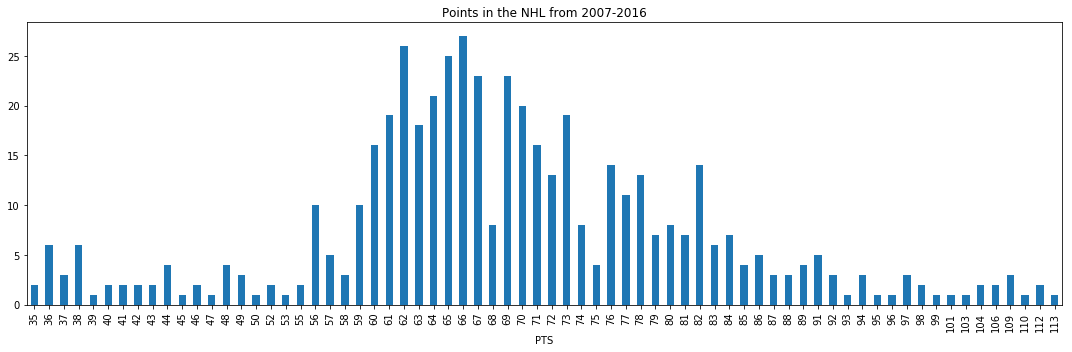

In [16]:
plt.figure(figsize=(15,5))
most_points.groupby('PTS').size().plot(kind='bar',title = 'Points in the NHL from 2007-2016')
plt.tight_layout()

In [17]:
most_points.mean()

GP                   74.89800
G                    27.27800
A                    41.74400
PTS                  69.02200
Points per Game       0.92554
Year               2011.50000
dtype: float64

`most_points.mean()` gives us the mean of all the point stats in the NHLdata. 69.02 is the mean of all the points of the top scorers in the 10 seasons, which is reflected in the plot. 

### 2.2 - Rookies by Year

Every year in the NHL newly drafted (or undrafted) players can make an impact on a team. Let's create a new dataframe listing the players who have made the top 50 player leaderboard in their first NHL season career. **We want to find out which year from 2007-2016 had the most rookies make the top 50 leaderboard.** From [hockey-reference.com](http://www.hockey-reference.com/awards/rookiemonthly.html) we can find out which players have made it to the top leaderboard and from there we will locate them in the DataFrame `NHLdata`.

In [146]:
Pkane = get_names.loc['Patrick Kane'] # 2007 
NikB = get_names.loc['Nicklas Backstrom'] # 2007 
Skinner = get_names.loc['Jeff Skinner'] # 2010
MacKinnon = get_names.loc['Nathan MacKinnon'] # 2013
Forsberg = get_names.loc['Filip Forsberg'] #2014
JohnnyHockey = get_names.loc['Johnny Gaudreau'] #2014
Bread = get_names.loc['Artemi Panarin'] # 2015
Matthews = get_names.loc['Auston Matthews'] # 2016
Laine = get_names.loc['Patrik Laine'] #2016
Nylander = get_names.loc['William Nylander'] #2016 
Marner = get_names.loc['Mitchell Marner'] #2016

Next let's get the first year these players have been in the top leaderboard

In [147]:
Pkane = Pkane[0:1]
NikB = NikB[0:1]
Skinner = Skinner[0:1]
MacKinnon = NHL13[34:35].set_index('Name')
Forsberg = Forsberg[0:1]
JohnnyHockey = JohnnyHockey[0:1]
Bread = Bread[0:1]
Matthews = NHL16[26:27].set_index('Name')
Laine = NHL16[30:31].set_index('Name')
Nylander = NHL16[36:37].set_index('Name')
Marner = NHL16[34:35].set_index('Name')

In [148]:
lor = [Pkane,NikB,Skinner,Forsberg,JohnnyHockey,Bread,MacKinnon,Matthews,Laine,Nylander,Marner]

In [149]:
Rookies = pd.concat(lor)

In [150]:
Rookies

,Team,POS,GP,G,A,PTS,Points per Game,Year
Name,,,,,,,,
Patrick Kane,CHI,RW,82,21,51,72,0.88,2007
Nicklas Backstrom,WAS,C,82,14,55,69,0.84,2007
Jeff Skinner,CAR,C,82,31,32,63,0.77,2010
Filip Forsberg,NSH,RW,82,26,37,63,0.77,2014
Johnny Gaudreau,CGY,LW,80,24,40,64,0.80,2014
Artemi Panarin,CHI,LW,80,30,47,77,0.96,2015
Nathan MacKinnon,COL,C,82,24,39,63,0.77,2013
Auston Matthews,TOR,C,76,36,27,63,0.83,2016
Patrik Laine,WPG,RW,69,34,27,61,0.88,2016


Now we have all the players in their rookie year in a new DataFrame. We can plot out their points:

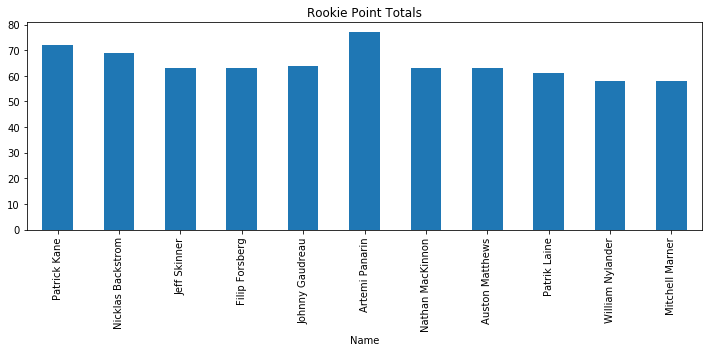

In [151]:
plt.figure(figsize=(10,5))
Rookies['PTS'].plot(kind='bar',title='Rookie Point Totals')
plt.tight_layout()

From the Rookie Point Totals plot, we can see that ** [Artemi Panarin](https://en.wikipedia.org/wiki/Artemi_Panarin)** of the [Chicago Blackhawks](https://en.wikipedia.org/wiki/Chicago_Blackhawks) has the most points in his rookie season. 

We can group the data by year and see which year produced the most productive rookies

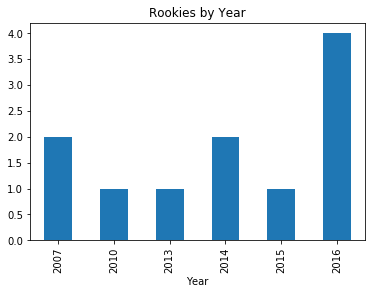

In [152]:
Rookies.groupby('Year').size().plot(kind='bar',title = 'Rookies by Year')

Here we see that in 2016 we have 4 players in the top leaderboard with 2 in 2007 and 2014 and 1 in 2010, 2013, 2015.

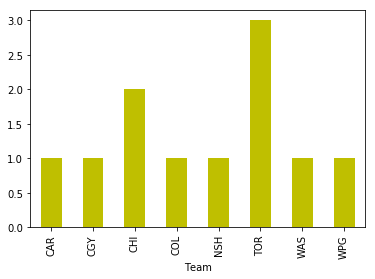

In [161]:
Rookies.groupby('Team').size().plot(kind='bar',color='y')

Here we find that the team with the most rookies in the top leaderboard play for the [Toronto Maple Leafs](https://en.wikipedia.org/wiki/Toronto_Maple_Leafs). 

### 2.3 Top Defenceman

Defence is a player position whose primary role is to prevent the opposition from scoring. In the NHL there are two types of defencemen; Offensive and Defensive. ** We want to find out from the 10 seasons, which defenceman has the most points and where that defenceman lies in relation to every other player in the league. ** 

First we'll need to get the DataFrame consisting of only defencemen. 

In [79]:
Defence = NHLdata[NHLdata['POS'] == 'D'].set_index('Name')
Defence.head()

,Team,POS,GP,G,A,PTS,Points per Game,Year
Name,,,,,,,,
Nicklas Lidstrom,DET,D,76,10,60,70,0.92,2007
Sergei Gonchar,PIT,D,78,12,53,65,0.83,2007
Mike Green,WAS,D,68,31,42,73,1.07,2008
Mike Green,WAS,D,75,19,57,76,1.01,2009
Duncan Keith,CHI,D,82,14,55,69,0.84,2009


Let's plot out the goals, assists and points of the defencemen:

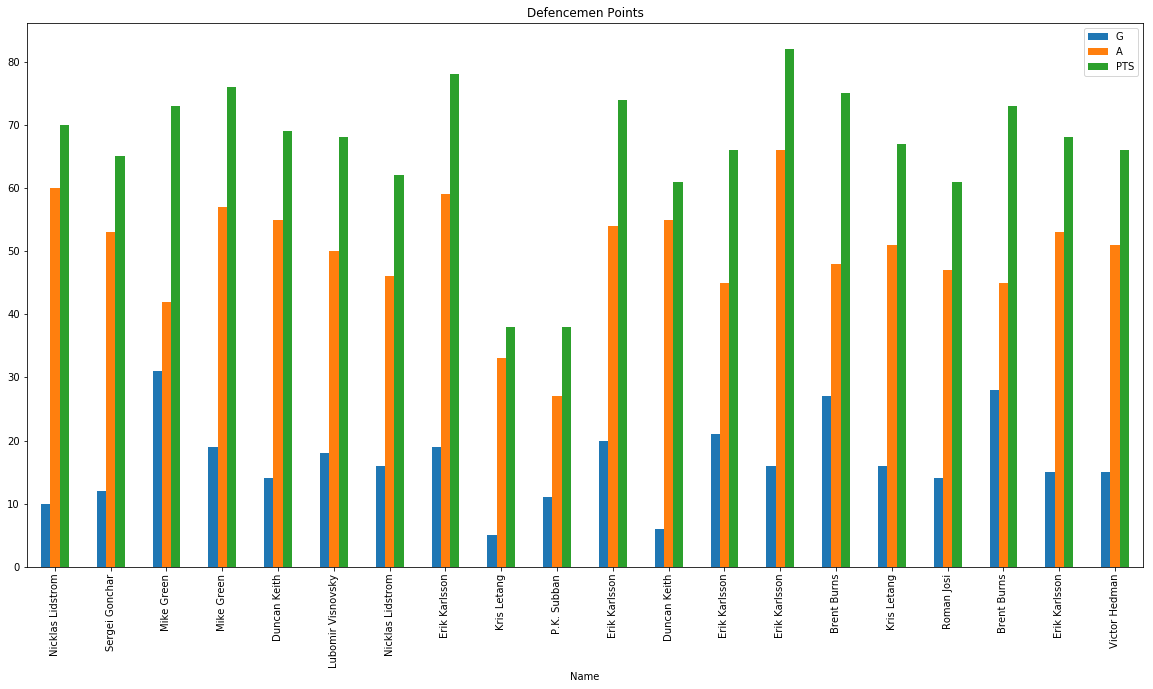

In [135]:
Defence[['G','A','PTS']].plot(kind='bar',title = 'Defencemen Points',figsize=(20,10))

In [80]:
Top_D = Defence.sort_values(by = 'PTS',ascending = False)
Top_D.head()

,Team,POS,GP,G,A,PTS,Points per Game,Year
Name,,,,,,,,
Erik Karlsson,OTT,D,82,16,66,82,1.00,2015
Erik Karlsson,OTT,D,81,19,59,78,0.96,2011
Mike Green,WAS,D,75,19,57,76,1.01,2009
Brent Burns,SJ,D,82,27,48,75,0.91,2015
Erik Karlsson,OTT,D,82,20,54,74,0.90,2013


We find that ** [Erik Karlsson](https://en.wikipedia.org/wiki/Erik_Karlsson)** of the [Ottawa Senators](https://en.wikipedia.org/wiki/Ottawa_Senators) has the most points of all defencemen in the 10 seasons. 

Now we want to find how he ranks in relation to other players in the league. 

In [13]:
NHLsorted = NHLdata.sort_values(by = 'PTS',ascending=False) # Sorted NHLdata PTS high to low
NHLsorted = NHLsorted.reset_index()

In [14]:
NHLsorted['Rank'] = NHLsorted.index + 1 # Add a column keeping count of the ranking in the list. 

In [15]:
NHLsorted = NHLsorted.set_index('Name') 
NHLsorted.head()

,index,Team,POS,GP,G,A,PTS,Points per Game,Year,Rank
Name,,,,,,,,,,
Evgeni Malkin,0,PIT,C,82,35,78,113,1.38,2008,1
Alex Ovechkin,0,WAS,LW,82,65,47,112,1.37,2007,2
Henrik Sedin,0,VAN,C,82,29,83,112,1.37,2009,3
Alex Ovechkin,1,WAS,LW,79,56,54,110,1.39,2008,4
Alex Ovechkin,2,WAS,LW,72,50,59,109,1.51,2009,5


In [16]:
NHLsorted.loc['Erik Karlsson'].head(1)

,index,Team,POS,GP,G,A,PTS,Points per Game,Year,Rank
Name,,,,,,,,,,
Erik Karlsson,4,OTT,D,82,16,66,82,1.0,2015,66


** We find that Erik's best season ranks him 66th overall ** above the 500 players. 

### 2.4 - Sidney Crosby vs. Alexander Ovechkin

One of the greatest rivalries in the NHL currently is between [Sidney Crosby](https://en.wikipedia.org/wiki/Sidney_Crosby) and [Alexander Ovechkin](https://en.wikipedia.org/wiki/Alexander_Ovechkin) since Crosby entered the league in 2005. He was drafted first overall. Ovechkin was drafted first overall the previous year. Let's get their data from 2007-2016 and **find out which of them has scored the most points and averaged the most points per game**. 

We begin by getting the player data: 

In [100]:
Crosby = get_names.loc['Sidney Crosby']
Ovi = get_names.loc['Alex Ovechkin']

In [101]:
Crosby

,Team,POS,GP,G,A,PTS,Points per Game,Year
Name,,,,,,,,
Sidney Crosby,PIT,C,53,24,48,72,1.36,2007
Sidney Crosby,PIT,C,77,33,70,103,1.34,2008
Sidney Crosby,PIT,C,81,51,58,109,1.35,2009
Sidney Crosby,PIT,C,41,32,34,66,1.61,2010
Sidney Crosby,PIT,C,36,15,41,56,1.56,2012
Sidney Crosby,PIT,C,80,36,68,104,1.30,2013
Sidney Crosby,PIT,C,77,28,56,84,1.09,2014
Sidney Crosby,PIT,C,80,36,49,85,1.06,2015
Sidney Crosby,PIT,C,70,42,40,82,1.17,2016


Sidney Crosby was not listed in 2011 due to a concussion. According to his [Wikipedia Page](https://en.wikipedia.org/wiki/Sidney_Crosby) Crosby only had 22 GP, 8 G, 29A, 37 PTS that season. 

In [102]:
Ovi

,Team,POS,GP,G,A,PTS,Points per Game,Year
Name,,,,,,,,
Alex Ovechkin,WAS,LW,82,65,47,112,1.37,2007
Alex Ovechkin,WAS,LW,79,56,54,110,1.39,2008
Alex Ovechkin,WAS,LW,72,50,59,109,1.51,2009
Alex Ovechkin,WAS,LW,79,32,53,85,1.08,2010
Alex Ovechkin,WAS,LW,78,38,27,65,0.83,2011
Alex Ovechkin,WAS,RW,48,32,24,56,1.17,2012
Alex Ovechkin,WAS,RW,78,51,28,79,1.01,2013
Alex Ovechkin,WAS,LW,81,53,28,81,1.00,2014
Alex Ovechkin,WAS,LW,79,50,21,71,0.90,2015


We can see that in 2009 Crosby and Ovechkin both scored 109 points, however Ovechkin's best season was in 2007 scoring 112 points while Crosby's best was 109 points. Let's add up their Games Played, Goals, Assists, and Points.

In [91]:
CGP = Crosby['GP'].sum()
CGoal = Crosby['G'].sum()
CAss = Crosby['A'].sum()
CPTS = Crosby['PTS'].sum()

In [92]:
OGP = Ovi['GP'].sum()
OG = Ovi['G'].sum()
OAss = Ovi['A'].sum()
OPTS = Ovi['PTS'].sum()

In [93]:
CrosbyTotal = [CGP,CGoal,CAss,CPTS]
CrosbyTotal

[595, 297, 464, 761]

In [94]:
OviTotal = [OGP,OG,OAss,OPTS]
OviTotal

[752, 460, 374, 834]

From the totals, we can see that Sidney Crosby played less games (595) than Alex Ovechkin (752). Sidney Crosby scored 297 Goals, 464 Assists, totalling 761 points from 2007-2016. Alex Ovechkin scored 460 Goals, 374 Assists totalling 834 total points from 2007-2016. We can calculate both player's total average points per game: 

In [95]:
CrosbyPPG = CPTS / CGP
CrosbyPPG

1.2789915966386554

In [96]:
OviPPG = OPTS / OGP
OviPPG

1.1090425531914894

Sidney Crosby averaged a higher total points per game (1.28) than Alex Ovechkin (1.11). 

Now let's plot both of the player's points per game on a single plot. 

In [125]:
# Resetting the DataFrames and reindex by Year
Crosby = Crosby.reset_index().set_index('Year') 
Ovi = Ovi.reset_index().set_index('Year')

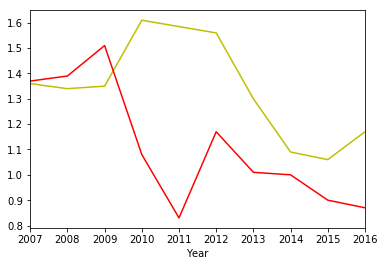

In [126]:
Crosby['Points per Game'].plot(color = 'y')
Ovi['Points per Game'].plot(color = 'r')
plt.show()

This plot shows that Crosby's points per Game is a lot higher than Ovechkin, which suggests that Crosby is a more productive player than Alex Ovechkin. Notice how Ovechkin averaged a lot more goals per game in the late 2000's and then almost ended up producing half that much by 2016? Why is this happening when Ovechkin has more points than Crosby? 

Remember ** points per game is calculated from dividing the number of points by games played.** Sidney Crosby spent less time playing due to injuries than Ovechkin, thus when he returned to the ice, he was able to score more points in less games than Ovechkin which results in a higher average point per game. 

In conclusion, it is hard to say which player is better from this one statistic, however, if we were to just look at which player has the ** most points overall, Alex Ovechkin ** would be the winner. 

### 2.5 - The Sedin Twins

[Henrik Sedin](https://en.wikipedia.org/wiki/Henrik_Sedin) and [Daniel Sedin](https://en.wikipedia.org/wiki/Daniel_Sedin) were both drafted together in 1999 by the [Vancouver Canucks](https://en.wikipedia.org/wiki/Vancouver_Canucks) 3rd and 2nd overall respectively. These two have played together throughout their careers both on the NHL and International level. ** Henrik is known for his passing and Daniel for his scoring **, so let's see if this is reflected in their stats. Let's gather the data: 

In [128]:
Hank = get_names.loc['Henrik Sedin']
Dany = get_names.loc['Daniel Sedin']

In [56]:
Sedins = pd.concat([Hank,Dany]).sort_values(by = 'PTS',ascending=False) # Both twin data listed by PTS high to low
Sedins

,Team,POS,GP,G,A,PTS,Points per Game,Year
Name,,,,,,,,
Henrik Sedin,VAN,C,82,29,83,112,1.37,2009
Daniel Sedin,VAN,LW,82,41,63,104,1.27,2010
Henrik Sedin,VAN,C,82,19,75,94,1.15,2010
Daniel Sedin,VAN,LW,63,29,56,85,1.35,2009
Henrik Sedin,VAN,C,82,22,60,82,1.00,2008
Daniel Sedin,VAN,LW,82,31,51,82,1.00,2008
Henrik Sedin,VAN,C,82,14,67,81,0.99,2011
Henrik Sedin,VAN,C,82,15,61,76,0.93,2007
Daniel Sedin,VAN,LW,82,20,56,76,0.93,2014


In [57]:
HankG = Hank['G'].sum()
HankA = Hank['A'].sum()
HankP = Hank['PTS'].sum()
DanyG = Dany['G'].sum()
DanyA = Dany['A'].sum()
DanyP = Dany['PTS'].sum()

In [58]:
print(HankG,DanyG)

128 220


In the 10 seasons, Daniel has scored a total of 220 goals while Henrik has scored 128. 

In [59]:
print(HankA,DanyA)

435 369


In the 10 seasons, Henrik scored a total of 435 Assists while Daniel has scored 369

Let's compare their total average points per game as we did when we compared Sidney and Alex: 

In [72]:
HankPPG = Hank['PTS'].sum() / Hank['GP'].sum()
DanyPPG = Dany['PTS'].sum() / Dany['GP'].sum()

In [73]:
HankPPG

1.0425925925925925

In [74]:
DanyPPG

0.9949324324324325

Let's now plot their goals and assists:

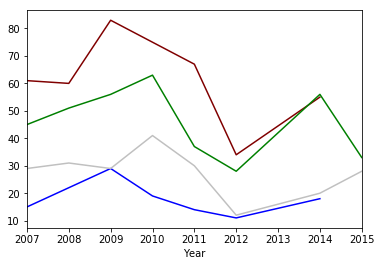

In [132]:
Hank = Hank.reset_index().set_index('Year')
Dany = Dany.reset_index().set_index('Year')
Hank['G'].plot(color = 'blue')
Dany['G'].plot(color = 'silver')
Hank['A'].plot(color = 'maroon')
Dany['A'].plot(color = 'green')
plt.show()

** This plot shows that Henrik has more assists than Daniel and Daniel has more goals than Henrik in the past 10 seasons. **